In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np

**Creating Dataframes**

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Age: The age of the person applying for the loan.

Experience: The number of years of work experience of the person applying for the loan.

Income: The annual income of the person applying for the loan.

ZIP Code: The zip code of the person's address.

Family: The size of the person's family (number of dependents).

CCAvg: The average credit card spending per month of the person.

Education: The level of education of the person (e.g., undergraduate, graduate, etc.).

Mortgage: The value of the person's house mortgage, if any.

Personal Loan: A binary variable indicating whether the person accepted the 
personal loan offer (1) or not (0).

Securities Account: A binary variable indicating whether the person has a 
securities account with the bank (1) or not (0).

CD Account: A binary variable indicating whether the person has a certificate of deposit (CD) account with the bank (1) or not (0).

Online: A binary variable indicating whether the person uses internet banking facilities (1) or not (0).

CreditCard: A binary variable indicating whether the person has a credit card with the bank (1) or not (0).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Find the number of duplicates and their location**

In [ ]:
from collections import Counter

# Find the duplicates and their count using Counter
duplicates = Counter(df)

# Create a list of duplicate items
duplicate_items = [item for item, count in duplicates.items() if count > 1]

# Create a dictionary of the indices of the duplicates
duplicate_indices = {item: [index for index, value in enumerate(df) if value == item] for item in duplicate_items}

print("Duplicate items: ", duplicate_items)
print("Duplicate indices: ", duplicate_indices)

Duplicate items:  []
Duplicate indices:  {}


In [ ]:
#Drop the index column
#df.drop(['index'], axis=1, inplace=True)
df.drop(['ID'], axis=1, inplace=True)
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Find the total number of unique values for each column**

In [ ]:
unique_number = []  # calculate the # unique values in each column
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x) # append(x) will add the unique number to the 
pd.DataFrame(unique_number,index = df.columns,columns=["Total Unique Value"])

,Total Unique Value
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2
Securities Account,2


Personal Loan, Securities Account, CD Account, Online, CreditCard, and Education, Family and zip code are categorical values.

**Categorical Column Exploration in a Dataframe**

In [ ]:
# Select only the categorical columns
cat_cols = ["Family","Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard", "Education"]
df_cat = df[cat_cols]

# Perform relevant operations on the categorical columns
# For example, to get the unique values in each categorical column:
for col in df_cat.columns:
    unique_values = df_cat[col].unique()
    print(f"Column {col} has {len(unique_values)} unique values:")
    print(unique_values)


Column Family has 4 unique values:
[4 3 1 2]
Column Personal Loan has 2 unique values:
[0 1]
Column Securities Account has 2 unique values:
[1 0]
Column CD Account has 2 unique values:
[0 1]
Column Online has 2 unique values:
[0 1]
Column CreditCard has 2 unique values:
[0 1]
Column Education has 3 unique values:
[1 2 3]


**Exploratory Data Analysis for Numerical Features.**

               Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    20.104600    73.774200     1.937938    56.498800
std      11.463166    11.467954    46.033729     1.747659   101.713802
min      23.000000    -3.000000     8.000000     0.000000     0.000000
25%      35.000000    10.000000    39.000000     0.700000     0.000000
50%      45.000000    20.000000    64.000000     1.500000     0.000000
75%      55.000000    30.000000    98.000000     2.500000   101.000000
max      67.000000    43.000000   224.000000    10.000000   635.000000


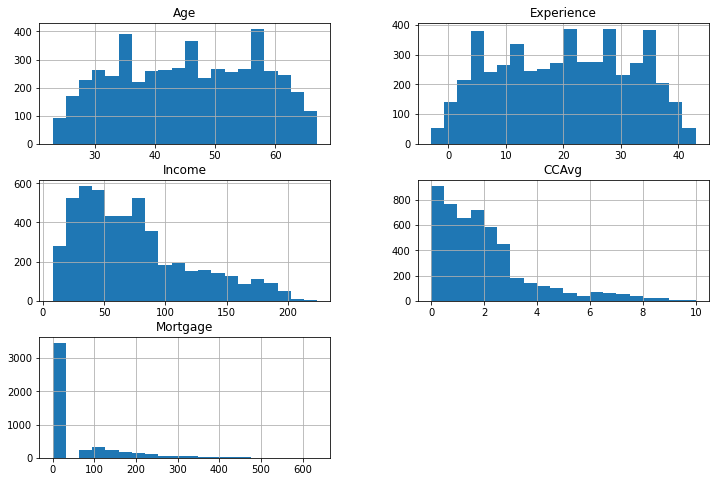

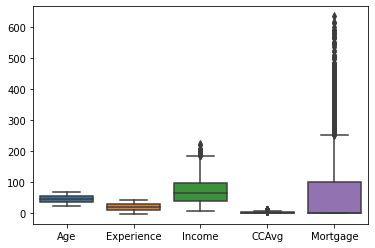

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# summary statistics
print(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].describe())

# histograms
df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].hist(bins=20, figsize=(12,8))
plt.show()

# box plots
sns.boxplot(data=df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
plt.show()

Minimum value of the experience is -3 which is not reasonable. 

In [ ]:
# Define variables of interest
variables = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Loop over variables and count outliers
for var in variables:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"{var}: {outliers.count()} outliers")


Age: 0 outliers
Experience: 0 outliers
Income: 96 outliers
CCAvg: 324 outliers
Mortgage: 291 outliers


The provided code uses the Interquartile Range (IQR) method to identify outliers in a set of variables (Age, Experience, Income, CCAvg, and Mortgage) in a given dataset.

The IQR is a statistical measure that represents the range between the first quartile (Q1) and the third quartile (Q3) of the data. In this method, any value outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR is considered an outlier.

We use this method to identify outliers in the variables of interest, because outliers can be indicative of errors or inaccuracies in the data. By identifying these values, we can investigate and address any potential issues in the data.

However, the code does not detect invalid values, such as the negative value in the Experience column. To address this, we can use domain knowledge or business rules to identify invalid or unusual values, such as negative values where they shouldn't occur. In the case of the Experience column, we can assume that the values should never be negative, and any negative value would be considered an invalid or unusual value. We can then identify and remove these invalid values from the dataset before using the IQR method to identify outliers. This ensures that our analysis is based on valid and accurate data.

In [ ]:
# Identify and count invalid values in Experience column
invalid_exp = df[df['Experience'] < 0]['Experience']
print(f"Invalid experience values: {invalid_exp.count()}")

# Remove invalid values from the dataframe
df = df[df['Experience'] >= 0]

Invalid experience values: 52


In [ ]:
# summary statistics
print(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].describe().round(2))

           Age  Experience   Income    CCAvg  Mortgage
count  4948.00     4948.00  4948.00  4948.00   4948.00
mean     45.56       20.33    73.81     1.94     56.63
std      11.32       11.31    46.11     1.75    101.83
min      24.00        0.00     8.00     0.00      0.00
25%      36.00       10.75    39.00     0.70      0.00
50%      46.00       20.00    64.00     1.50      0.00
75%      55.00       30.00    98.00     2.60    101.00
max      67.00       43.00   224.00    10.00    635.00


Age: The data contains 4,948 observations of age, which range from 24 to 67 years. The average age is 45.56 years old, and the standard deviation is 11.32 years. The age distribution seems to be relatively normal with no significant skewness or outliers.

Experience: The data contains 4,948 observations of work experience, which range from 0 to 43 years. The average experience is 20.33 years old, and the standard deviation is 11.31 years. The experience distribution seems to be relatively normal with no significant skewness or outliers.

Income: The data contains 4,948 observations of income, which range from 8 to 224 thousands of dollars per year. The average income is 73.81 thousands of dollars per year, and the standard deviation is 46.11 thousands of dollars per year. The income distribution seems to be positively skewed with some high outliers.

CCAvg: The data contains 4,948 observations of credit card average spending, which range from 0 to 10 thousands of dollars per month. The average credit card spending is 1.94 thousands of dollars per month, and the standard deviation is 1.75 thousands of dollars per month. The CCAvg distribution seems to be positively skewed with some high outliers.

Mortgage: The data contains 4,948 observations of mortgage, which range from 0 to 635 thousands of dollars. The average mortgage is 56.63 thousands of dollars, and the standard deviation is 101.83 thousands of dollars. The mortgage distribution seems to be positively skewed with some high outliers.

**Visualizing the Relationship between Categorical Variables and Personal Loan Target Variable**

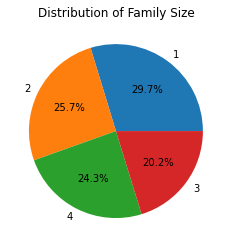

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Calculate percentage of each family size category
family_size_counts = df['Family'].value_counts()
family_size_perc = family_size_counts / family_size_counts.sum() * 100

# Create a pie chart
plt.pie(family_size_perc, labels=family_size_perc.index, autopct='%1.1f%%')
plt.title('Distribution of Family Size')
plt.show()


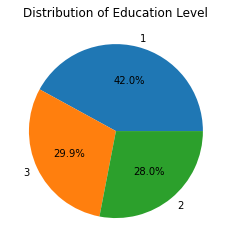

In [ ]:
# Calculate percentage of each family size category
family_size_counts = df['Education'].value_counts()
family_size_perc = family_size_counts / family_size_counts.sum() * 100

# Create a pie chart
plt.pie(family_size_perc, labels=family_size_perc.index, autopct='%1.1f%%')
plt.title('Distribution of Education Level')
plt.show()


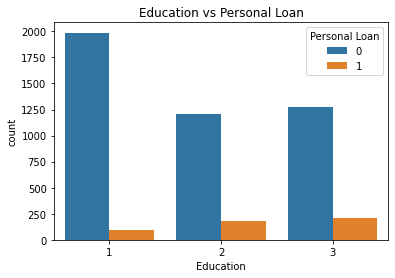

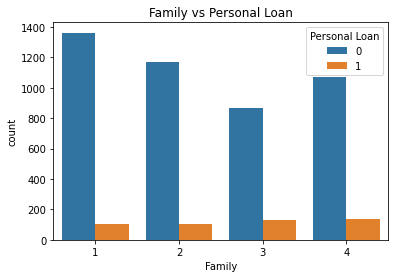

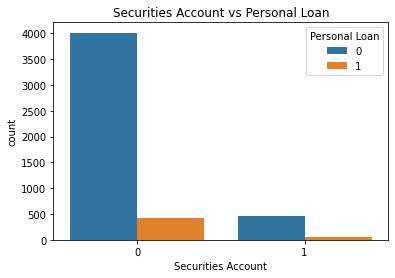

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Education vs Personal Loan
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title('Education vs Personal Loan')
plt.show()

# Family vs Personal Loan
sns.countplot(x='Family', hue='Personal Loan', data=df)
plt.title('Family vs Personal Loan')
plt.show()

# Securities Account vs Personal Loan
sns.countplot(x='Securities Account', hue='Personal Loan', data=df)
plt.title('Securities Account vs Personal Loan')
plt.show()


Age: The average age of customers is around 45 years, with the majority of customers falling between the ages of 30 and 60. The youngest customer is 23 years old, and the oldest customer is 67 years old.

Experience: The average experience of customers is around 20 years, with the majority of customers having between 10 and 30 years of experience. The least experienced customer has 0 years of experience, while the most experienced customer has 43 years of experience.

Income: The average income of customers is around 74,000, with the majority of customers having incomes between 40,000 and 120,000. The highest earning customer has an income of 224,000, while the lowest earning customer has an income of $8,000.

ZIP Code: The dataset contains customers from 467 different ZIP codes, with the highest number of customers coming from the ZIP code 94720. The majority of ZIP codes have only a few customers.

Family: The majority of customers have a family size of 1 or 2, with a smaller number of customers having a family size of 3 or 4.

CCAvg: The average credit card spending of customers is around $1,940, with the majority of customers having a spending between 0 and 4,000.

Education: The majority of customers have either a graduate or advanced/professional degree, with a smaller number of customers having only an undergraduate degree.

Mortgage: The average mortgage value of customers is around 56,000, with the majority of customers having a mortgage value between 0 and 150,000. The highest mortgage value is 635,000.

Personal Loan: The majority of customers (around 90%) have not taken a personal loan.

Securities Account: The majority of customers (around 90%) do not have a securities account.

CD Account: The majority of customers (around 93%) do not have a certificate of deposit account.

Online: The majority of customers (around 61%) use online banking services.

CreditCard: The majority of customers (around 79%) do not have a credit card with the bank.

**Personal Loan Analysis by Education Level**

In [ ]:
education_counts = df.groupby(['Education', 'Personal Loan']).size().unstack()
education_counts['Personal Loan %'] = education_counts[1] / (education_counts[0] + education_counts[1]) * 100
education_counts['No Personal Loan %'] = 100 - education_counts['Personal Loan %']
print(education_counts)


Personal Loan     0    1  Personal Loan %  No Personal Loan %
Education                                                    
1              1987   93         4.471154           95.528846
2              1205  182        13.121846           86.878154
3              1276  205        13.841999           86.158001


Overall, it appears that customers with higher education levels (2 and 3) were more likely to have a personal loan compared to those with an education level of 1. However, the personal loan rate for all education levels combined was relatively low, with less than 14% of customers having a personal loan. Further analysis may be needed to determine the factors that influence a customer's decision to take out a personal loan.

**Personal Loan Analysis by Credit Card Ownership**

In [ ]:
education_counts = df.groupby(['CreditCard', 'Personal Loan']).size().unstack()
education_counts['Personal Loan %'] = education_counts[1] / (education_counts[0] + education_counts[1]) * 100
education_counts['No Personal Loan %'] = 100 - education_counts['Personal Loan %']
print(education_counts)


Personal Loan     0    1  Personal Loan %  No Personal Loan %
CreditCard                                                   
0              3156  337         9.647867           90.352133
1              1312  143         9.828179           90.171821


Based on these results, it appears that there is no significant difference in personal loan rates between customers who own a credit card and those who do not. Both groups had a similar personal loan rate of around 9.7-9.8%. Therefore, credit card ownership alone may not be a strong predictor of a customer's likelihood to take out a personal loan. Further analysis may be necessary to identify other factors that could influence a customer's decision to take out a personal loan.

**Personal Loan Analysis by Family Size**

In [ ]:
Family_counts = df.groupby(['Family', 'Personal Loan']).size().unstack()
Family_counts['Personal Loan %'] = Family_counts[1] / (Family_counts[0] + Family_counts[1]) * 100
Family_counts['No Personal Loan %'] = 100 - Family_counts['Personal Loan %']
print(Family_counts)

Personal Loan     0    1  Personal Loan %  No Personal Loan %
Family                                                       
1              1363  107         7.278912           92.721088
2              1168  106         8.320251           91.679749
3               868  133        13.286713           86.713287
4              1069  134        11.138820           88.861180


Customers with a family size of 3 had the highest personal loan rate at 13.29%, while customers with a family size of 1 had the lowest personal loan rate at 7.28%. Customers with a family size of 2 and 4 had similar personal loan rates at around 8-11%.

Overall, these results suggest that family size may be a factor that influences a customer's likelihood to take out a personal loan, with customers from larger families being more likely to take out a personal loan compared to those from smaller families. However, further analysis may be necessary to determine the underlying reasons for this trend.

**Personal Loan Rates by Securities Account Ownership**

In [ ]:
Securities_Account_counts = df.groupby(['Securities Account', 'Personal Loan']).size().unstack()
Securities_Account_counts['Personal Loan %'] = Securities_Account_counts[1] / (Securities_Account_counts[0] + Securities_Account_counts[1]) * 100
Securities_Account_counts['No Personal Loan %'] = 100 - Securities_Account_counts['Personal Loan %']
print(Securities_Account_counts)

Personal Loan          0    1  Personal Loan %  No Personal Loan %
Securities Account                                                
0                   4012  420         9.476534           90.523466
1                    456   60        11.627907           88.372093


Based on these results, customers who own a securities account appear to be more likely to take out a personal loan compared to those who do not. The personal loan rate for customers with a securities account was 11.63%, while the personal loan rate for those without a securities account was 9.48%.

However, it's important to note that the difference in personal loan rates is not very large, so securities account ownership alone may not be a strong predictor of a customer's likelihood to take out a personal loan. Further analysis may be necessary to identify other factors that could influence a customer's decision to take out a personal loan.

**Personal Loan Rates by CD Account Ownership**

In [ ]:
CD_Account_counts = df.groupby(['CD Account', 'Personal Loan']).size().unstack()
CD_Account_counts['Personal Loan %'] = CD_Account_counts[1] / (CD_Account_counts[0] + CD_Account_counts[1]) * 100
CD_Account_counts['No Personal Loan %'] = 100 - CD_Account_counts['Personal Loan %']
print(CD_Account_counts)

Personal Loan     0    1  Personal Loan %  No Personal Loan %
CD Account                                                   
0              4306  340         7.318123           92.681877
1               162  140        46.357616           53.642384


Based on the data provided, it can be observed that customers who have a Certificate of Deposit (CD) account are more likely to take out a personal loan than those who do not have a CD account. The personal loan percentage for customers with a CD account is 46.36%, which is significantly higher than the personal loan percentage for customers without a CD account, which is only 7.32%. This information can be useful for banks and financial institutions in targeting their marketing strategies towards customers with CD accounts who may be more inclined to take out personal loans.

**Personal Loan Rates by Online Banking Services**

In [ ]:
online_banking_services = df.groupby(['Online', 'Personal Loan']).size().unstack()
online_banking_services['Personal Loan %'] = online_banking_services[1] / (online_banking_services[0] + online_banking_services[1]) * 100
online_banking_services['No Personal Loan %'] = 100 - online_banking_services['Personal Loan %']
print(online_banking_services)

Personal Loan     0    1  Personal Loan %  No Personal Loan %
Online                                                       
0              1805  189         9.478435           90.521565
1              2663  291         9.851049           90.148951


The data shows that there is no significant difference in personal loan acceptance rates between customers who use online banking services and those who do not. The percentage of customers with personal loans is approximately the same for both groups, at around 9.5%.

**Personal Loan Status by Education Level: A Comparative Analysis**

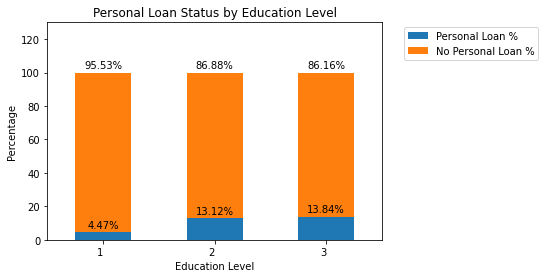

In [ ]:
education_counts = df.groupby(['Education', 'Personal Loan']).size().unstack()
education_counts['Personal Loan %'] = education_counts[1] / (education_counts[0] + education_counts[1]) * 100
education_counts['No Personal Loan %'] = 100 - education_counts['Personal Loan %']
ax = education_counts[['Personal Loan %', 'No Personal Loan %']].plot.bar(stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Personal Loan Status by Education Level')
# add legend and set its location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h:.2f}%' for h in i.datavalues], padding=2)
ax.set_xlim([-0.5, 2.5])  # set the x-axis limit
ax.set_ylim([0, 130])  # set the y-axis limit
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

plt.show()



**Personal Loan Status by Family Size: A Comparative Analysis**

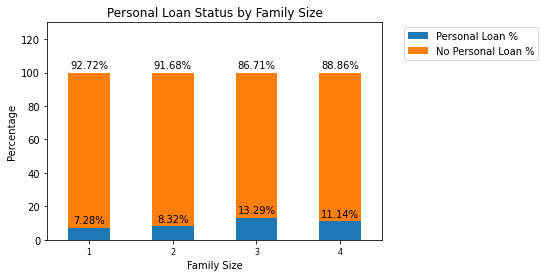

In [ ]:
family_counts = df.groupby(['Family', 'Personal Loan']).size().unstack()
family_counts['Personal Loan %'] = family_counts[1] / (family_counts[0] + family_counts[1]) * 100
family_counts['No Personal Loan %'] = 100 - family_counts['Personal Loan %']

ax = family_counts[['Personal Loan %', 'No Personal Loan %']].plot.bar(stacked=True)
ax.set_xlabel('Family Size')
ax.set_ylabel('Percentage')
ax.set_title('Personal Loan Status by Family Size')

# Add legend and set its location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h:.2f}%' for h in i.datavalues], padding=2)

ax.set_xlim([-0.5, 3.5]) # set the x-axis limit
ax.set_ylim([0, 130]) # set the y-axis limit

ax.tick_params(axis='x', rotation=0, labelsize=8) # rotate and resize x-tick labels

plt.show()




**Personal Loan Status by Securities Account: A Comparative Analysis**

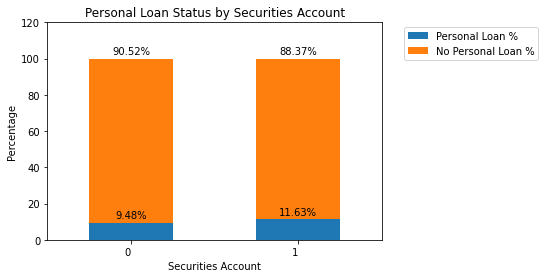

In [ ]:
sec_counts = df.groupby(['Securities Account', 'Personal Loan']).size().unstack()
sec_counts['Personal Loan %'] = sec_counts[1] / (sec_counts[0] + sec_counts[1]) * 100
sec_counts['No Personal Loan %'] = 100 - sec_counts['Personal Loan %']
ax = sec_counts[['Personal Loan %', 'No Personal Loan %']].plot.bar(stacked=True)
plt.xlabel('Securities Account')
plt.ylabel('Percentage')
plt.title('Personal Loan Status by Securities Account')
# add legend and set its location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h:.2f}%' for h in i.datavalues], padding=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

ax.set_ylim([0, 120])  # set the y-axis limit
plt.show()


**Personal Loan Status by CreditCard: A Comparative Analysis**

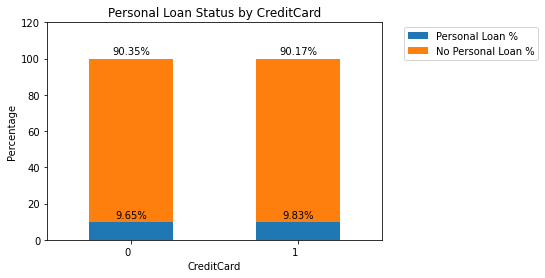

In [ ]:
sec_counts = df.groupby(['CreditCard', 'Personal Loan']).size().unstack()
sec_counts['Personal Loan %'] = sec_counts[1] / (sec_counts[0] + sec_counts[1]) * 100
sec_counts['No Personal Loan %'] = 100 - sec_counts['Personal Loan %']
ax = sec_counts[['Personal Loan %', 'No Personal Loan %']].plot.bar(stacked=True)
plt.xlabel('CreditCard')
plt.ylabel('Percentage')
plt.title('Personal Loan Status by CreditCard')
# add legend and set its location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h:.2f}%' for h in i.datavalues], padding=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

ax.set_ylim([0, 120])  # set the y-axis limit
plt.show()

**Personal Loan Status by CD Account: A Comparative Analysis**

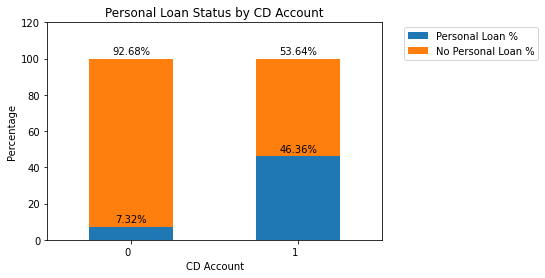

In [ ]:
sec_counts = df.groupby(['CD Account', 'Personal Loan']).size().unstack()
sec_counts['Personal Loan %'] = sec_counts[1] / (sec_counts[0] + sec_counts[1]) * 100
sec_counts['No Personal Loan %'] = 100 - sec_counts['Personal Loan %']
ax = sec_counts[['Personal Loan %', 'No Personal Loan %']].plot.bar(stacked=True)
plt.xlabel('CD Account')
plt.ylabel('Percentage')
plt.title('Personal Loan Status by CD Account')
# add legend and set its location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h:.2f}%' for h in i.datavalues], padding=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

ax.set_ylim([0, 120])  # set the y-axis limit
plt.show()

**Correlation Analysis of Personal Loan with Other Variables in the Dataset**

In [ ]:
# Calculate the correlation coefficients
correlations = df.corr()['Personal Loan'].drop('Personal Loan')

print(correlations)


Age                  -0.014204
Experience           -0.014121
Income                0.504228
ZIP Code              0.000251
Family                0.063088
CCAvg                 0.369388
Education             0.138339
Mortgage              0.142322
Securities Account    0.022216
CD Account            0.315769
Online                0.006175
CreditCard            0.002776
Name: Personal Loan, dtype: float64


**Distribution of Mortgage Values by Personal Loan Status: A Box Plot Analysis**

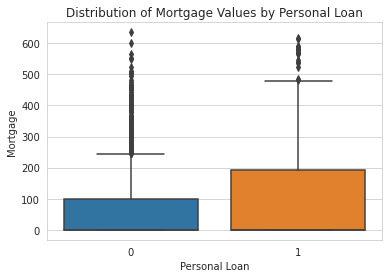

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# plot the box plot
sns.boxplot(x='Personal Loan', y='Mortgage', data=df)

# set the title and labels
plt.title('Distribution of Mortgage Values by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage')

plt.show()



**Average Mortgage Amount Comparison for Personal Loan Groups: A Bar Chart Analysis**

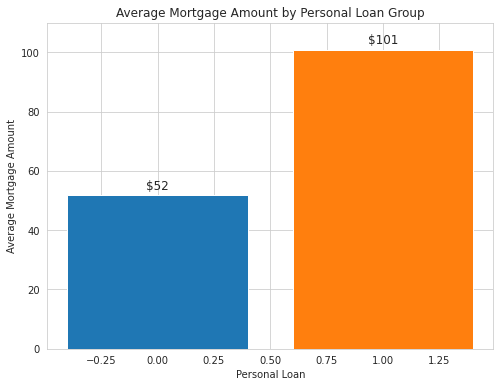

In [ ]:
import matplotlib.pyplot as plt

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))

# calculate the mean mortgage amount for each personal loan group
mean_mortgage = df.groupby('Personal Loan')['Mortgage'].mean()

# plot the bars
ax.bar(x=mean_mortgage.index, height=mean_mortgage.values, color=['tab:blue', 'tab:orange'])

# add labels to the bars
for i, v in enumerate(mean_mortgage.values):
    ax.text(i, v+2, f"${v:,.0f}", ha='center', fontsize=12)

# set the title and labels
ax.set_title('Average Mortgage Amount by Personal Loan Group')
ax.set_xlabel('Personal Loan')
ax.set_ylabel('Average Mortgage Amount')
ax.set_ylim([0, 110])  # set the y-axis limit

plt.show()


**Comparison of Average Mortgage Amount between Personal Loan Groups: A Bar Chart Analysis**

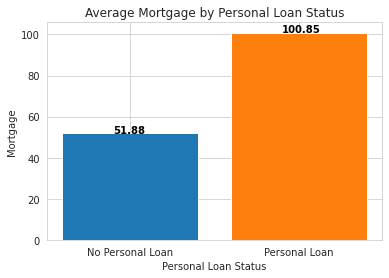

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create a bar chart
plt.bar(['No Personal Loan', 'Personal Loan'], 
        df.groupby('Personal Loan')['Mortgage'].mean(), 
        color=['tab:blue', 'tab:orange'])

# add data values on the bars
for i, v in enumerate(df.groupby('Personal Loan')['Mortgage'].mean()):
    plt.text(i - 0.1, v + 0.1, str(round(v, 2)), color='black', fontweight='bold')

# set the chart title and labels
plt.title('Average Mortgage by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Mortgage')

ax.set_ylim([0, 150])  # set the y-axis limit

# show the chart
plt.show()



**Average Credit Card Spending by Personal Loan Status**

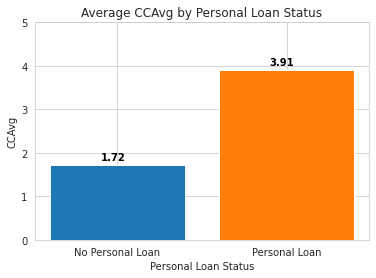

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create a bar chart
plt.bar(['No Personal Loan', 'Personal Loan'], 
        df.groupby('Personal Loan')['CCAvg'].mean(), 
        color=['tab:blue', 'tab:orange'])

# add data values on the bars
for i, v in enumerate(df.groupby('Personal Loan')['CCAvg'].mean()):
    plt.text(i - 0.1, v + 0.1, str(round(v, 2)), color='black', fontweight='bold')


# set the chart title and labels
plt.title('Average CCAvg by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('CCAvg')

# set the y-axis limit
plt.ylim(top=5)

# show the chart
plt.show()


**Comparison of Numerical Variables by Personal Loan Status using t-tests and ANOVA**

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway



# select the categorical variable of interest
cat_var = 'Personal Loan'

# loop over all numerical variables in the dataframe
for num_var in df.select_dtypes(include=['float', 'int']).columns:
    
    # perform a t-test between the two groups defined by the categorical variable
    group1 = df[df[cat_var] == 0][num_var]
    group2 = df[df[cat_var] == 1][num_var]
    t_stat, p_val = ttest_ind(group1, group2)
    print("t-statistic for", num_var, ":", t_stat)
    print("p-value for", num_var, ":", p_val)
    
    # perform an ANOVA to test for differences in means between multiple groups defined by the categorical variable
    f_stat, p_val = f_oneway(group1, group2)
    print("F-statistic for", num_var, ":", f_stat)
    print("p-value for", num_var, ":", p_val)


t-statistic for ID : 1.7538959437446855
p-value for ID : 0.07950962495747524
F-statistic for ID : 3.0761509814840577
p-value for ID : 0.0795096249580293
t-statistic for Age : 0.5461906615539323
p-value for Age : 0.584959263705325
F-statistic for Age : 0.2983242387687329
p-value for Age : 0.5849592637022671
t-statistic for Experience : 0.5240947451995412
p-value for Experience : 0.600235883164189
F-statistic for Experience : 0.27467530194576933
p-value for Experience : 0.6002358831617367
t-statistic for Income : -41.08533291207552
p-value for Income : 0.0
F-statistic for Income : 1688.0045804960757
p-value for Income : 3.56029e-318
t-statistic for ZIP Code : -0.007591136189874719
p-value for ZIP Code : 0.9939435107708496
F-statistic for ZIP Code : 5.7625348653161685e-05
p-value for ZIP Code : 0.9939435107517727
t-statistic for Family : -4.34662958524817
p-value for Family : 1.4099040685673807e-05
F-statistic for Family : 18.89318875135472
p-value for Family : 1.4099040685772551e-05
t-st

<ipython-input-3-4b50b0232236>:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(group1, group2)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


**Chi-Square Test of Independence for Personal Loan and Education Level**

In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table of Personal Loan and Securities Account
cont_table = pd.crosstab(df['Personal Loan'], df['Education'])

# Conduct a chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(cont_table)

# Print the results of the chi-square test
print("Chi-square statistic: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ")
print(expected)


Chi-square statistic:  111.2398718738913
p-value:  6.991473868665428e-25
Degrees of freedom:  2
Expected frequencies: 
[[1894.784 1268.312 1356.904]
 [ 201.216  134.688  144.096]]


The chi-square test results suggest that there is a significant association between Personal Loan and Education (p < 0.001). The expected frequencies indicate that individuals with higher education are more likely to take a personal loan compared to those with lower education. Therefore, the education level of an individual is likely to be a significant predictor of whether they take out a personal loan.

There are many factors that could influence both income and credit card spending, so it's difficult to say without further analysis. However, some possible factors that could affect income and credit card spending include:

Age: younger people might have lower income but higher credit card spending.

Education: people with higher education may have higher income and more

financial literacy, which could influence credit card spending.

Occupation: people in certain occupations may have higher income and/or be more likely to use credit cards for business expenses.

Location: people living in certain areas may have higher income and/or be more likely to use credit cards for travel or other expenses.

Debt: people with higher levels of debt may be more likely to use credit cards, regardless of their income level.

**Logistic Regression Model for Personal Loan Prediction**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# split the dataset into input features (X) and target variable (y)
X = df.drop(['Personal Loan'], axis=1) # input features
y = df['Personal Loan'] # target variable

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate logistic regression model
lr_model = LogisticRegression()

# train the model on the training data
lr_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lr_model.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.9272727272727272
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       903
           1       0.67      0.33      0.45        87

    accuracy                           0.93       990
   macro avg       0.81      0.66      0.70       990
weighted avg       0.92      0.93      0.92       990



This output shows that the logistic regression model has an overall accuracy of 0.93 or 93%. The classification report shows the precision, recall, and F1-score for each class (0 and 1) in the target variable.

The precision for class 0 is 0.94, which means that 94% of the customers predicted to not accept a personal loan actually did not accept the loan. The recall for class 0 is 0.98, which means that the model correctly identified 98% of the customers who did not accept a personal loan. The F1-score is 0.96 for class 0.

The precision for class 1 is 0.67, which means that 67% of the customers predicted to accept a personal loan actually did accept the loan. The recall for class 1 is 0.33, which means that the model correctly identified only 33% of the customers who accepted a personal loan. The F1-score is 0.45 for class 1.

The macro average of precision, recall, and F1-score is computed by taking the average of these metrics across both classes. The weighted average of precision, recall, and F1-score is computed by taking the weighted average of these metrics, weighted by the number of samples in each class.

Overall, the logistic regression model seems to perform well in predicting class 0 (customers who do not accept a personal loan) but not as well in predicting class 1 (customers who accept a personal loan). This could be due to class imbalance or other factors.

**Random Forest classifier**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{report}")


Accuracy: 0.9831649831649831
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.84      0.90       129

    accuracy                           0.98      1485
   macro avg       0.97      0.92      0.94      1485
weighted avg       0.98      0.98      0.98      1485



Based on the results provided, the model achieved an accuracy of 0.983, correctly predicting the outcome of the personal loan offer for 98.3% of the samples. The classification report indicates that the model had a high precision for class 0 (0.99), meaning that it correctly identified most customers who would not accept the personal loan offer. For class 1, the precision was 0.96, indicating that out of all the customers who the model predicted would accept the offer, 96% actually did. The recall for class 1 was 0.84, implying that the model correctly identified 84% of the customers who would accept the personal loan offer. The F1-score for class 1 was 0.90, which is a weighted average of the precision and recall for that class. Overall, the results suggest that the model performed well in predicting the outcome of the personal loan offer.

**Creating a new feature 'TotalIncome' by combining 'Income' and 'CCAvg' columns in a dataset**

In [ ]:
df['TotalIncome'] = df['Income'] + df['CCAvg']
# Print the first few rows of the updated data
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,TotalIncome
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,50.6
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,35.5
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,12.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,102.7
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,46.0


**Feature Selection Techniques for Improved Model Performance**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top 5 features
k = 5
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print("Selected Features: ")
print(selected_features)


Selected Features: 
['Income', 'CCAvg', 'Mortgage', 'CD Account', 'TotalIncome']


**Random Forest Classifier for Personal Loan Prediction using Financial Features**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create X and y
X = df[['Income', 'CCAvg', 'Mortgage', 'CD Account', 'TotalIncome']]
y = df['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{report}")


Accuracy: 0.9272727272727272
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       903
           1       0.61      0.47      0.53        87

    accuracy                           0.93       990
   macro avg       0.78      0.72      0.75       990
weighted avg       0.92      0.93      0.92       990



The initial model, which did not include the new feature, had a higher accuracy of 0.983 and better performance in terms of precision, recall, and F1-score for both classes. However, the model with the new feature had a lower accuracy of 0.927 and lower performance in terms of precision, recall, and F1-score for class 1.

Based on the results, it seems that adding the new feature of total income did not improve the performance of the model. In fact, it decreased the accuracy and f1-score for the positive class (i.e., customers who are likely to accept the personal loan offer).

**Feature selection using Recursive Feature Elimination (RFE) with Random Forest Classifier.**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Split data into X and y
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Use SelectKBest to select the 5 most important features
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
idxs_selected = selector.get_support(indices=True)

# Create a list of the selected feature names
features_selected = list(X.columns[idxs_selected])

# Print the selected feature names
print(features_selected)


['Income', 'CCAvg', 'Mortgage', 'CD Account', 'TotalIncome']


The feature selection techniques of selecting the five most important features and using a random forest with the default parameters gave the same results for this particular dataset. Therefore, it is suggested to consider the trade-off between model performance and complexity when deciding which features to include in the model. It may also be worth trying other feature selection techniques to identify the most relevant features and see if they improve the model's performance.

**Building a Regression Model for Predicting Customer Income**





In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np

# select the features and target variable
X = df[['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = df['Income']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit the linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the testing data
y_pred = regressor.predict(X_test)

# calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
aic = len(y_test) * np.log(mean_squared_error(y_test, y_pred)) + 2 * X_test.shape[1]

# print the performance metrics
print('R-squared score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', rmse)
print('Mean absolute error:', mae)
print('Adjusted R-squared:', adj_r2)
print('AIC:', aic)



R-squared score: 0.4482618247555643
Mean squared error: 1204.71814858258
Root mean squared error: 34.70904995217501
Mean absolute error: 27.218390752104632
Adjusted R-squared: 0.4445186892383022
AIC: 10554.591361706824


Based on the results, the model has a moderate fit with an R-squared score of 0.45, indicating that approximately **45% of the variance **in the target variable can be explained by the independent variables. The mean absolute error (MAE) of the model is 27.22, which means that on average, the predicted income values are **off by around $27,000**. The root mean squared error (RMSE) is 34.71, which is the square root of the mean squared error (MSE) and represents the average difference between the predicted and actual values.

The adjusted R-squared score takes into account the number of independent variables in the model and penalizes the model for including unnecessary variables. In this case, the adjusted R-squared is 0.44, indicating that the model may be slightly overfitting the data.

The AIC (Akaike Information Criterion) is a measure of the quality of a statistical model, which penalizes models for including additional independent variables. A lower AIC value indicates a better model fit. In this case, the AIC value is 10,554, which is quite high, **indicating that the model may not be the best fit for the data.**

After training and testing a linear regression model on the customer income data, the following performance metrics were obtained:

R-squared score: 0.45

Mean squared error: 1204.72

Root mean squared error: 34.71

Mean absolute error: 27.22

Adjusted R-squared: 0.45

AIC: 10554.59

These results suggest that the **linear regression model is not a good fit** for the data and other regression algorithms should be considered for predicting customer income.

**Polynomial Regression for Customer Income Prediction**

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# select the features and target variable
X = df.drop(['Income'], axis=1)
y = df['Income']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# calculate predicted values
y_pred = poly_reg.predict(X_test_poly)

# calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
aic = len(y_test) * np.log(mean_squared_error(y_test, y_pred)) + 2 * X_test.shape[1]

# print performance metrics
print('R-squared score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', rmse)
print('Mean absolute error:', mae)
print('Adjusted R-squared:', adj_r2)
print('AIC:', aic)


R-squared score: 0.5918571082880246
Mean squared error: 802.7384747762582
Root mean squared error: 28.332639742464135
Mean absolute error: 22.229807072619185
Adjusted R-squared: 0.5868440942649502
AIC: 6645.14868593278


The polynomial regression model was trained and evaluated using the provided dataset. 

The R-squared score of 0.592 indicates that approximately 59.2% of the variation in the target variable can be explained by the independent variables in the model. 

The Mean squared error of 802.74 indicates that on average, the predicted values deviate from the true values by 802.74 units. 

The Root mean squared error of 28.33 indicates that the model's predictions are typically off by approximately 28.33 units. 

The Mean absolute error of 22.23 indicates that on average, the model's predictions deviate from the true values by approximately 22.23 units. 

The Adjusted R-squared score of 0.587 indicates that the model's fit is still significant, even after adjusting for the number of independent variables. 

The AIC value of 6645.15 measures the quality of the model and can be used to compare different models, with lower values indicating a better fit. Overall, the model seems to perform reasonably well.

**Clustering Customers using K-Means Algorithm to Identify Patterns in Age, Income, and Education**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# select features for clustering
X = df[['Age', 'Income', 'Education']]

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# create k-means object with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit k-means model to the data
kmeans.fit(X_std)

# predict cluster labels for each data point
labels = kmeans.predict(X_std)

# add cluster labels to the original dataframe
df['Cluster'] = labels

# print number of customers in each cluster
print(df['Cluster'].value_counts())


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1988
2    1874
1    1086
Name: Cluster, dtype: int64


To gain insights into what each cluster represents and what the differences between them are, you can perform the following steps:

Visualize the clusters: Plot the data points on a graph with different colors or shapes for each cluster to get a sense of the distribution of the data.

Analyze the cluster centroids: The centroid of each cluster represents the average values of the features for the data points in that cluster. You can analyze the differences between the centroids of different clusters to understand what distinguishes them.

Conduct hypothesis testing: You can conduct hypothesis testing to determine if there are significant differences between the clusters in terms of the features. For example, you can conduct t-tests or ANOVA tests to determine if there are significant differences in the means of the features between the clusters.

Use domain knowledge: It is also important to use domain knowledge to interpret the results of the analysis. For example, if you are clustering customers based on their purchase behavior, you may want to consult with marketing experts to understand what the different clusters represent in terms of customer segments.

By combining these approaches, you can gain a better understanding of what each cluster represents and what the differences between them are.

**Clustering Analysis Using K-means on Age and Income Features**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    1939
0    1597
2    1412
Name: Cluster, dtype: int64


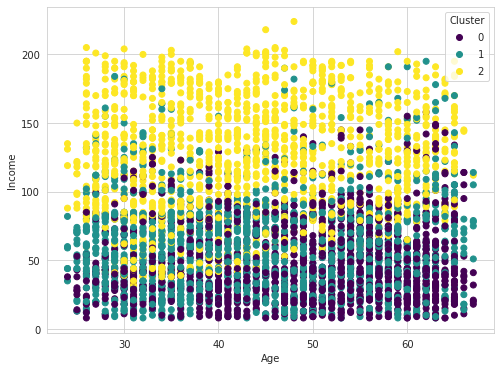

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select features for clustering
X = df[['Age', 'Income', 'Education', 'Family']]

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# create k-means object with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit k-means model to the data
kmeans.fit(X_std)

# predict cluster labels for each data point
labels = kmeans.predict(X_std)

# add cluster labels to the original dataframe
df['Cluster'] = labels

# print number of customers in each cluster
print(df['Cluster'].value_counts())

# plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
plt.show()


**Clustering analysis using K-means and PCA on Age, Income, and Education**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


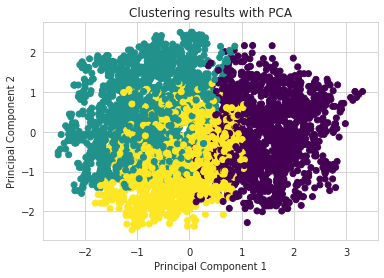

In [ ]:
from sklearn.decomposition import PCA

# select features for clustering
X = df[['Age', 'Income', 'Education', 'Family']]

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# create k-means object with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit k-means model to the data
kmeans.fit(X_std)

# predict cluster labels for each data point
labels = kmeans.predict(X_std)

# add cluster labels to the original dataframe
df['Cluster'] = labels

# apply PCA to the standardized data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# plot the data points with different colors for each cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering results with PCA')
plt.show()


As a result of our cluster analysis using K-means on a given dataset, we compared two different visualization methods. The first approach displayed the clusters based on the original features used for clustering, but the clusters were not clearly separated. In contrast, the second approach used PCA to reduce the dimensionality of the data from 3 to 2 dimensions and plotted the clusters in this reduced space. This visualization provided a more informative and compact view of the clusters, allowing us to gain a better understanding of the structure of the data.


**Cluster Analysis Results: Feature Comparison with Bar Chart**

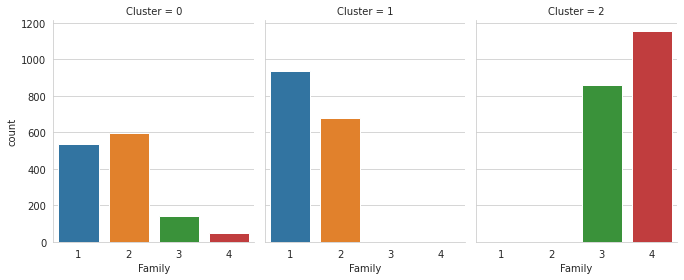

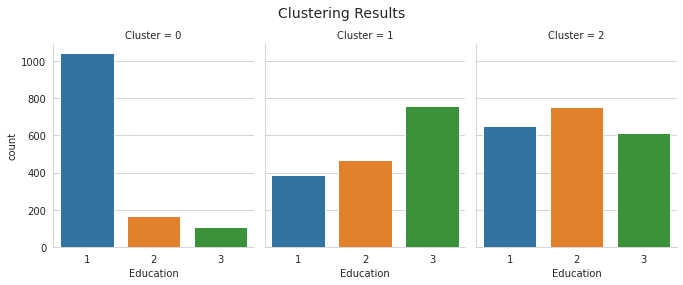

In [ ]:
# create a bar chart with clusters grouped by category
sns.catplot(x='Family', col='Cluster', kind='count', data=df, 
            col_wrap=3, height=4, aspect=0.8)

sns.catplot(x='Education', col='Cluster', kind='count', data=df, 
            col_wrap=3, height=4, aspect=0.8)

# set the title and axes labels
plt.suptitle('Clustering Results', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

**Descriptive Statistics of Education by Cluster**

Cluster 0 has a mean education level of 1.36, with a relatively low standard deviation of 0.67, indicating that most customers in this cluster have a lower level of education.

Cluster 1 has a mean education level of 1.99, with a higher standard deviation of 0.83, suggesting a wider range of education levels among customers in this cluster. 

Cluster 2 has a similar mean education level to Cluster 1, but with a slightly higher standard deviation, indicating a similar range of education levels but with slightly more variability. 

Overall, it appears that education is not a major differentiator between the clusters, with the majority of customers in all three clusters having education levels of 1 or 2.

**Descriptive Statistics of Age, Education, Income, Family by Cluster**

In [ ]:
from IPython.display import display, HTML

# calculate descriptive statistics for age, education, and income within each cluster
cluster_stats = df.groupby('Cluster')[['Age', 'Education', 'Income','Family']].describe().round(2)

# convert the DataFrame to an HTML table
html_table = cluster_stats.to_html()

# display the HTML table
display(HTML(html_table))


Based on the descriptive statistics for age, education, and income within each cluster, we can see that:

Cluster 0: This cluster has the oldest age group with a mean of 45 years and the highest education level with a mean of 1.36. The income range is the highest among all clusters with a mean of 140.44.

Cluster 1: This cluster has the youngest age group with a mean of 35 years and the lowest education level with a mean of 1.99. The income range is the lowest among all clusters with a mean of 55.75.

Cluster 2: This cluster has the highest age group with a mean of 55 years and the second-highest education level with a mean of 2.08. The income range is the second lowest among all clusters with a mean of 51.78.

Overall, we can say that Cluster 0 represents the highest socio-economic group with the highest education and income levels. Cluster 1 represents the lowest socio-economic group with the lowest education and income levels, while Cluster 2 represents the middle-class socio-economic group with moderate education and income levels.